In [10]:
import scipy.stats as sts
import matplotlib.pyplot as plt 
import numpy as np 
% matplotlib inline 

### Будем рассматривать распределение  Стьдента со степенями свободы  5

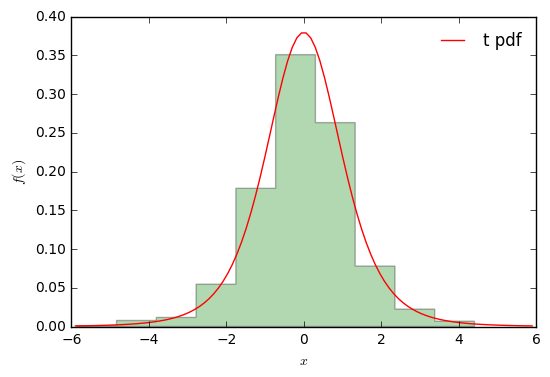

In [11]:

df = 5.0  # со степенью свободы 5

# сгенерируем выборку  1000 из распределения 
sample = sts.t.rvs(df, size = 1000)


# расчитаем теоритическую протность вероятности для распределения 
x = np.linspace(sts.t.ppf(0.001 , df), sts.t.ppf(0.999, df) , 100)

fig, ax = plt.subplots(1,1)
ax.plot(x , sts.t.pdf(x, df),'r-', lw = 1 , alpha = 1 ,label='t pdf')

# постороим гистограмму выборки и наложим на нее теоретическую вероятность 
ax.hist(sample, normed=True, histtype='stepfilled', alpha=0.3 , color = "green")
ax.legend(loc='best', frameon=False)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()


 Вывод : Как видно на графике, гистограмма не полностью соответсвует теоретической  оценке  плотности 

### Утверждение центральной предельной теоремы:
X ∼ F(x), Xn =  X1,X2,...,Xn  ⇒ Xn(avg) ≈∼ $N(\mu = \mathbb{E}X, \sigma^2 = \frac{\mathbb{D}X}{n})$.
С ростом n точность нормальной аппроксимации увеличивается.
Полученный результат справедлив не только для непрерывных распределений, но и для дискретных.
В нашем случае E(x) = 0 , при n > 1, D(x) = n/(n-2) , при n > 2.
##### Тогда ЦПТ примет вид: 
$N(\mu = 0, \sigma^2 = \frac{1}{n-2})$.

In [12]:
# Функция генерации гистограммы графика  случ. величин 
# и теоретической оценки плотности вероятности для распределения выборочных средних
def generate_pdf(n):
    # генерируем выборочное среднее по объему  выборки 
    means = []
    for _ in range(1000):
        sample = sts.t.rvs(df, size = n)
        sample_mean = np.mean(sample)
        means.append(sample_mean)
        
    # расчет теоритической  плотности для нормального расперделения 
    mu = 0 # theoretical mu
    sigma = (1./(n-2)) ** 0.5  # theoretical sigma 
    norm_rv = sts.norm(loc = mu , scale = sigma)
    x = np.linspace(-5,5,1000)
    pdf = norm_rv.pdf(x)
    
    # построим гистограмму выборочных средних и наложим на нее теоретическую 
    # оценку плотности вероятности нормального распределения
    plt.plot(x, pdf, lw = 1 ,color = 'red')
    plt.hist(means, normed = True, alpha=0.3 , color = "green")
    plt.xlabel('$\\bar{X}_n$')
    plt.ylabel('$f(\\bar{X}_n)$')
    plt.title('n = %d' % n)
    plt.show()

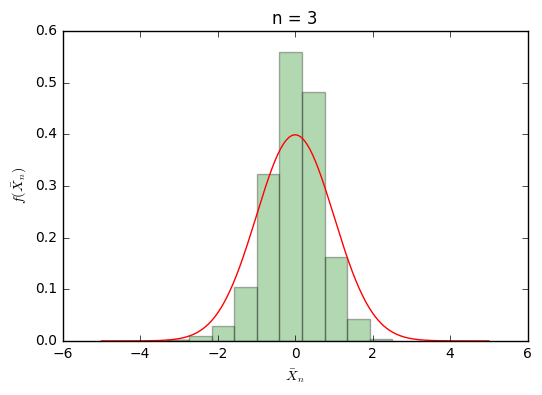

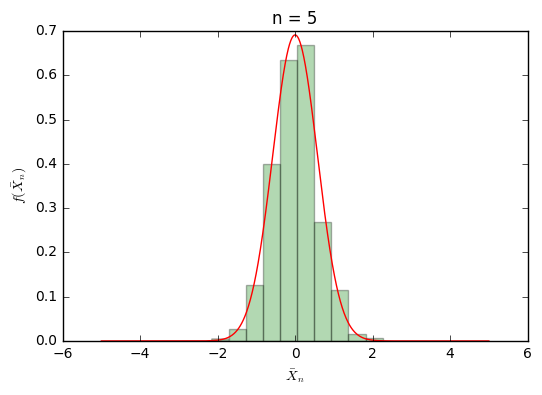

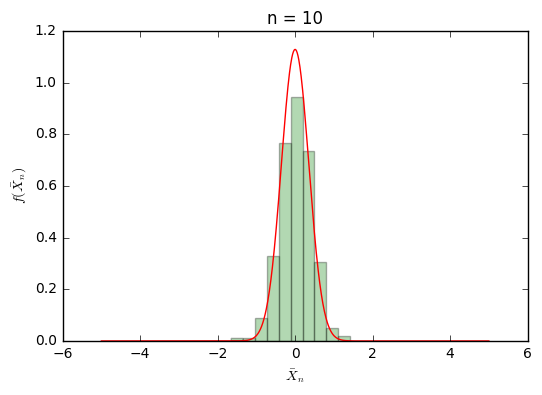

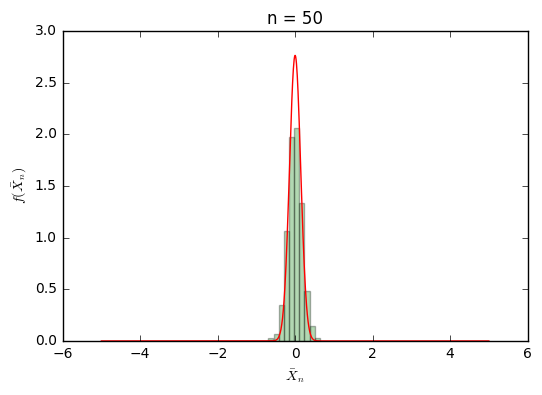

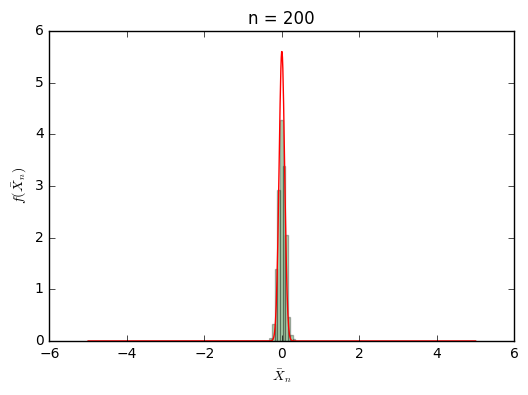

In [13]:
# построим гистограммы распределений выборочных средних и приближающих их нормальных распределений 
# при различных объемах выборок n
for n in [3, 5, 10, 50, 200 ]:
    generate_pdf(n)


### Вывод: 
глядя на график  можно сделать вывод, что распределение Стьюдента определяется для некоторого количества n случайных величин, удовлетворяющих нормальному распрделению. Это можно заметить из того , что при минимальном n , распределение  со степенями свободы > 3 практически симметрично нормальному. При n стремящемся к бесконечности это распределение сходится к нормальному.Таким образом распределение Стьюдента можно считать частным случаем нормального.